In [1]:
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from PIL import Image
from matplotlib.ticker import MaxNLocator

In [5]:
def read_n_plot(f,v,l):
    map_dataset=Dataset(f,maskandscale=True,mmap=False)
    
    lats=map_dataset.variables['lat'][:]
    lons=map_dataset.variables['lon'][:]
    elements  = map_dataset.variables[v][0,:,:]
    
    ax   = plt.axes(projection=ccrs.PlateCarree())
    
    plot=plt.contourf(lons, lats, elements, cmap = 'hsv', transform=ccrs.PlateCarree(),levels=l)
    #with levels^ without levels v
    #plot=plt.contourf(lons, lats, elements, cmap = 'viridis', transform=ccrs.PlateCarree())
    
    plt.colorbar(plot, ax=ax, shrink=0.8,pad=0.15)
    plt.title('Mumbai '+str(v))
    
    ax.set_extent([72.5,73.05,18.5,19.5])
    #mumbai ^, world v
    #ax.set_extent([70,90,10,40])
    
    ax.coastlines(color='red')
    ax.gridlines(draw_labels=True)
    
    
    new_name=str(v)
    plt.savefig(new_name,bbox_inches="tight",dpi=800)
    
    plt.show()

In [6]:
def plotx(f,v,l):
    nf=f+'.nc4'
    read_n_plot(nf,v,l)
    

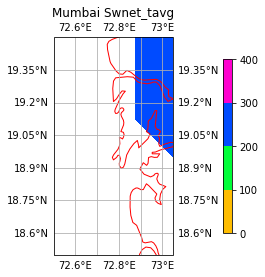

In [17]:
levels = MaxNLocator(nbins=40).tick_values(40,275)
plotx('GLDAS_NOAH025_M.A202203.021','Swnet_tavg',levels)